### Scroll to cell #153 to see Task 21

In [198]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [199]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [201]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())


In [202]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [203]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [204]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
# titanic_df.drop("Parch", axis=1, inplace=True)
# titanic_df.drop("SibSp", axis=1, inplace=True)


In [205]:
titanic_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [206]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [207]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [208]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


<Axes: >

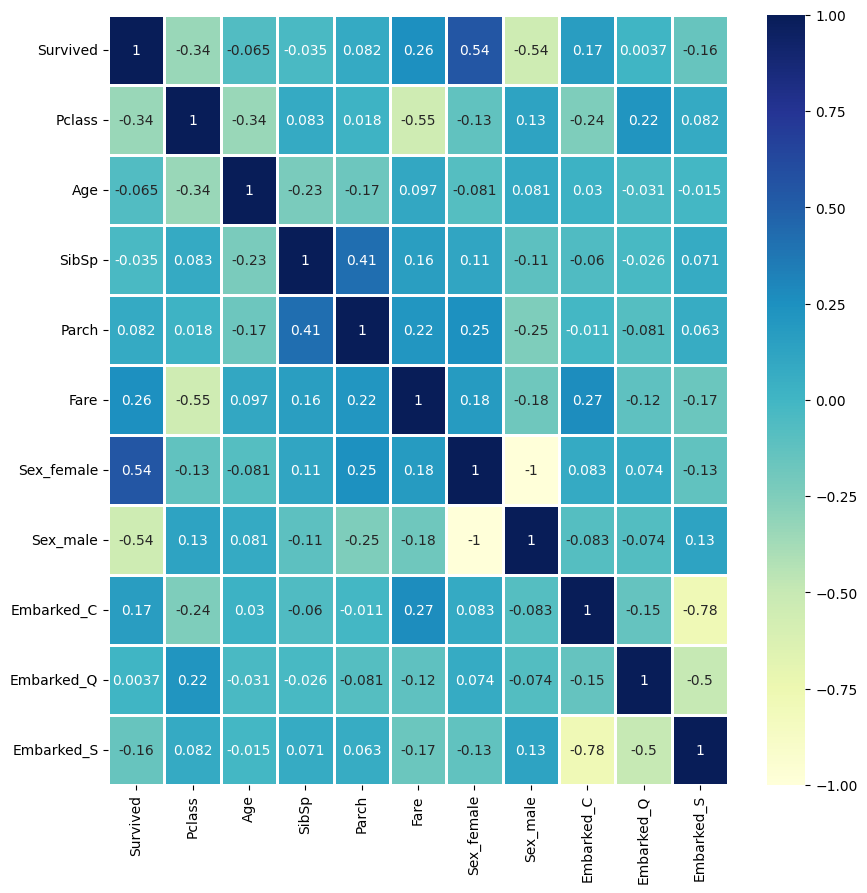

In [209]:

plt.figure(figsize=(10, 10))
sns.heatmap(titanic_df.corr(), annot=True, cmap='YlGnBu', linewidths=1)



In [210]:
X = titanic_df.drop('Survived', axis=1) # features
y = titanic_df['Survived'] # target 

# 80, 10 , 10 split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, train_size=0.5, random_state=42) 

print("Original df: ", titanic_df.shape)
print("X df: ", X.shape)
print("y df: ", y.shape)
print()
print("X_train_full df: ", X_train_full.shape)
print("X_test df: ", X_test.shape)
print()
print("y_train_full df: ", y_train_full.shape)
print("y_test df: ", y_test.shape)


Original df:  (891, 11)
X df:  (891, 10)
y df:  (891,)

X_train_full df:  (178, 10)
X_test df:  (713, 10)

y_train_full df:  (178,)
y_test df:  (713,)


In [211]:
#Split to TRAINING, DEVELOPMENT, TEST
unpruned_training = DecisionTreeClassifier(max_depth=None, random_state=42)
unpruned_dev = DecisionTreeClassifier(max_depth=None, random_state=42)

unpruned_training.fit(X_train_full, y_train_full) # training set
unpruned_dev.fit(X_train, y_train) # development set

#predict
y_pred_train = unpruned_training.predict(X_train_full)
y_pred_test = unpruned_training.predict(X_test)
y_pred_dev_train = unpruned_dev.predict(X_train)
y_pred_dev_test = unpruned_dev.predict(X_dev)

print("Training set")
print("Performance/Accuracy without pruning:", unpruned_training.score(X_test, y_test))
print("At depth:", unpruned_training.tree_.max_depth)
print("Training Accuracy: ", accuracy_score(y_train_full, y_pred_train))

print()
print("Development set")
print("Performance/Accuracy without pruning:", unpruned_dev.score(X_dev, y_dev))
print("At depth:", unpruned_dev.tree_.max_depth)
print("Dev Accuracy: ", accuracy_score(y_train, y_pred_dev_train))


Training set
Performance/Accuracy without pruning: 0.7251051893408135
At depth: 9
Training Accuracy:  1.0

Development set
Performance/Accuracy without pruning: 0.6741573033707865
At depth: 8
Dev Accuracy:  1.0


In [212]:
# looking at effect of pruning    - Training set
pruned_depths_training = range(1,unpruned_training.tree_.max_depth+1)

pruned_scores_training = [] 
for d in pruned_depths_training:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train_full, y_train_full)
    score = clf.score(X_test, y_test)
    pruned_scores_training.append(score)

# looking at effect of pruning    - Dev set
pruned_depths_dev = range(1,unpruned_dev.tree_.max_depth+1)

pruned_scores_dev = [] 
for d in pruned_depths_dev:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_dev, y_dev)
  score = clf.score(X_test, y_test)
  pruned_scores_dev.append(score)

Text(0, 0.5, 'Accuracy')

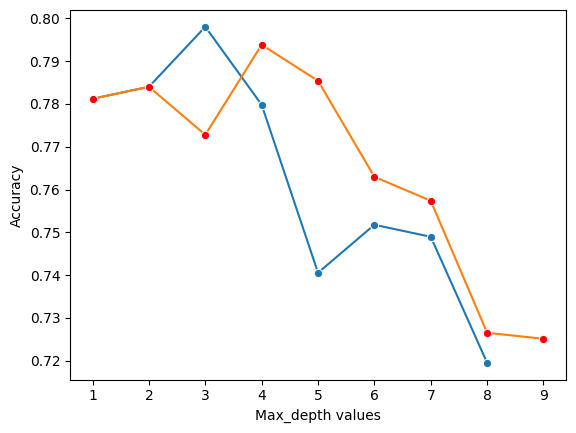

In [213]:


sns.lineplot(x=pruned_depths_dev, y=pruned_scores_dev, marker="o")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")

sns.lineplot(x=pruned_depths_training, y=pruned_scores_training, marker="o", markerfacecolor='red')
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")


In [214]:
# fitting the chosen tree
best_depth = pruned_depths_dev[np.argmax(pruned_scores_dev)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)


Best performance reached at depth of: 3


DecisionTreeClassifier(max_depth=3)

# Task 21 ----------------------------------------------------

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score


In [216]:
# X = titanic_df.drop('Survived', axis=1) # features
# y = titanic_df['Survived'] # target 

#Create new train_test_split for the decision trees
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

print("Original df: ", titanic_df.shape)
print("X df: ", X.shape)
print("y df: ", y.shape)
print()
print("X_train df: ", X_train.shape)
print("X_test df: ", X_test.shape)
print()
print("y_train df: ", y_train.shape)
print("y_test df: ", y_test.shape)


Original df:  (891, 11)
X df:  (891, 10)
y df:  (891,)

X_train df:  (178, 10)
X_test df:  (713, 10)

y_train df:  (178,)
y_test df:  (713,)


In [217]:
#Split to TRAINING, DEVELOPMENT, TEST
# BAGGING
bagging = BaggingClassifier(random_state=42)
bagging_dev = BaggingClassifier(random_state=42)

bagging.fit(X_train, y_train) # training set
bagging_dev.fit(X_train_dev, y_train_dev) # development set

#predict
y_pred_train = bagging.predict(X_train)
y_pred_test = bagging.predict(X_test)
y_pred_dev_train = bagging_dev.predict(X_train_dev)
y_pred_dev_test = bagging_dev.predict(X_test_dev)

print()
print("BaggingClassifier")
print("\tPerformance/Accuracy without pruning:", bagging.score(X_test, y_test))
print("\tTraining Accuracy: ", accuracy_score(y_train, y_pred_train))
print("\tDevelopment set")
print("\tPerformance/Accuracy without pruning:", bagging_dev.score(X_dev, y_dev))
print("\tDev Accuracy: ", accuracy_score(y_train_dev, y_pred_dev_train))



BaggingClassifier
	Performance/Accuracy without pruning: 0.761570827489481
	Training Accuracy:  0.9775280898876404
	Development set
	Performance/Accuracy without pruning: 0.7303370786516854
	Dev Accuracy:  0.9887640449438202


In [218]:
#Split to TRAINING, DEVELOPMENT, TEST
# BOOSTING
gb = GradientBoostingClassifier(random_state=42)
gb_dev = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train) # training set
gb_dev.fit(X_train_dev, y_train_dev) # development set

#predict
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
y_pred_dev_train = gb_dev.predict(X_train_dev)
y_pred_dev_test = gb_dev.predict(X_test_dev)

print()
print("GradientBoostingClassifier")
print("\tPerformance/Accuracy without pruning:", gb.score(X_test, y_test))
print("\tTraining Accuracy: ", accuracy_score(y_train, y_pred_train))
print("\tDevelopment set")
print("\tPerformance/Accuracy without pruning:", gb_dev.score(X_dev, y_dev))
print("\tDev Accuracy: ", accuracy_score(y_train_dev, y_pred_dev_train))



GradientBoostingClassifier
	Performance/Accuracy without pruning: 0.7868162692847125
	Training Accuracy:  0.9775280898876404
	Development set
	Performance/Accuracy without pruning: 0.6741573033707865
	Dev Accuracy:  1.0


In [219]:
#Split to TRAINING, DEVELOPMENT, TEST
# RANDOM FOREST
rf_train = RandomForestClassifier(max_depth=None, random_state=42)
rf_train_dev = RandomForestClassifier(max_depth=None, random_state=42)

rf_train.fit(X_train, y_train) # training set
rf_train_dev.fit(X_train_dev, y_train_dev) # development set

#predict
y_pred_train = rf_train.predict(X_train)
y_pred_test = rf_train.predict(X_test)
y_pred_dev_train = rf_train_dev.predict(X_train_dev)
y_pred_dev_test = rf_train_dev.predict(X_test_dev)

print()
print("RandomForestClassifier")
print("\tPerformance/Accuracy without pruning:", rf_train.score(X_test, y_test))
print("\tTraining Accuracy: ", accuracy_score(y_train, y_pred_train))
print("\tDevelopment set")
print("\tPerformance/Accuracy without pruning:", rf_train_dev.score(X_dev, y_dev))
print("\tDev Accuracy: ", accuracy_score(y_train_dev, y_pred_dev_train))



RandomForestClassifier
	Performance/Accuracy without pruning: 0.7798036465638148
	Training Accuracy:  1.0
	Development set
	Performance/Accuracy without pruning: 0.7528089887640449
	Dev Accuracy:  1.0


In [220]:
#Finding the important features using the built-in Gini importance
importances = rf_train.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df


# From the table we see the following as most impactful to the survivorbility
# 1. Fare / Age
# 2. Gender


,Feature,Gini Importance
4,Fare,0.233165
1,Age,0.230567
6,Sex_male,0.180383
5,Sex_female,0.147263
0,Pclass,0.076867
2,SibSp,0.038138
3,Parch,0.031940
9,Embarked_S,0.028033
7,Embarked_C,0.019248
8,Embarked_Q,0.014396


In [221]:
importances = rf_train_dev.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

,Feature,Gini Importance
4,Fare,0.278581
1,Age,0.172016
6,Sex_male,0.155392
5,Sex_female,0.150320
0,Pclass,0.097260
2,SibSp,0.054135
3,Parch,0.042611
9,Embarked_S,0.020665
7,Embarked_C,0.018568
8,Embarked_Q,0.010452


In [222]:
# Hyper-parameter turning for a random forest using GridSearcCV
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 9]
}

grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv = 3, 
                          n_jobs = -1, 
                          verbose=1,
                          scoring="r2")

grid_search.fit(X_train, y_train)

#Fitting 3 folds for each of 800 candidates, totalling 2400 fits


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150]},
             scoring='r2', verbose=1)

In [223]:
#Check best score hyperparameters
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best


0.22220477483635373


RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)

In [224]:
# Create rf model with parameters
rf_hp = RandomForestClassifier(max_depth=7, n_estimators=50, random_state=r)
rf_hp.fit(X_train,y_train)
y_test_pred_rf_hp = rf_hp.predict(X_test)


In [225]:
# print results
print()
print("BaggingClassifier")
print("\tPerformance/Accuracy without pruning:", bagging.score(X_test, y_test))
print("\tTraining Accuracy: ", accuracy_score(y_train, y_pred_train))
print("\tDevelopment set")
print("\tPerformance/Accuracy without pruning:", bagging_dev.score(X_dev, y_dev))
print("\tDev Accuracy: ", accuracy_score(y_train_dev, y_pred_dev_train))

print()
print("GradientBoostingClassifier")
print("\tPerformance/Accuracy without pruning:", gb.score(X_test, y_test))
print("\tTraining Accuracy: ", accuracy_score(y_train, y_pred_train))
print("\tDevelopment set")
print("\tPerformance/Accuracy without pruning:", gb_dev.score(X_dev, y_dev))
print("\tDev Accuracy: ", accuracy_score(y_train_dev, y_pred_dev_train))

print()
print("RandomForestClassifier")
print("\tPerformance/Accuracy without pruning:", rf_train.score(X_test, y_test))
print("\tTraining Accuracy: ", accuracy_score(y_train, y_pred_train))
print("\tDevelopment set")
print("\tPerformance/Accuracy without pruning:", rf_train_dev.score(X_dev, y_dev))
print("\tDev Accuracy: ", accuracy_score(y_train_dev, y_pred_dev_train))

print()
print(f'Testing Accuracy for Random Forest model with hyperparameters: {accuracy_score(y_test, y_test_pred_rf_hp)}')


BaggingClassifier
	Performance/Accuracy without pruning: 0.761570827489481
	Training Accuracy:  1.0
	Development set
	Performance/Accuracy without pruning: 0.7303370786516854
	Dev Accuracy:  1.0

GradientBoostingClassifier
	Performance/Accuracy without pruning: 0.7868162692847125
	Training Accuracy:  1.0
	Development set
	Performance/Accuracy without pruning: 0.6741573033707865
	Dev Accuracy:  1.0

RandomForestClassifier
	Performance/Accuracy without pruning: 0.7798036465638148
	Training Accuracy:  1.0
	Development set
	Performance/Accuracy without pruning: 0.7528089887640449
	Dev Accuracy:  1.0

Testing Accuracy for Random Forest model with hyperparameters: 0.8008415147265077


In [226]:
# rf with hyper tuning produced the best accuracy with max_depth=7, n_estimators=50, random_state=r